In [1]:
#Cargamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.available
plt.style.use("tableau-colorblind10")

In [2]:
# Cargamos los datos 

Datos =  pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv",
                     encoding="iso-8859-1")
Datos.head(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
Datos.tail(5)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


### Tipo de variables: 

In [4]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


Podemos observar que las variables tienen null, puesto que existen 15433 entradas, de las cuales 15316 son datos non-null, esto lo podemos apreciar mejor realizando un conteo de Na

In [5]:
Datos[Datos.isnull().sum(axis = 1) == 11]

#Datos.isnull().sum()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Algunas observaciones no tienen información. Estas observaciones podemos eliminarlas, para esto, buscamos los index que tienen 11 valores ausentes (total de variables) en sus filas

In [6]:
rango1 = Datos.index[Datos.isnull().sum(axis = 1) == 11]
rango1

Int64Index([770, 771, 772, 773, 774, 775, 776, 777, 778, 779,
            ...
            877, 878, 879, 880, 881, 882, 883, 884, 885, 886],
           dtype='int64', length=117)

Para eliminar las filas vacias tenemos varias alternaticas, se puede liminar los idex guardados en el rango1 o haciendo uso de la función pd.dropna(how = "all")

In [7]:
Datos = Datos.dropna(how = "all")
Datos.isna().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [8]:
Datos.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

Como podemos observar ya no encontramos datos null, sin embargo,Year debería ser el index del dataframe y ser de tipo int. 
Procedemos a realizar estos cambios


In [9]:
Datos["Year"] = Datos["Year"].astype(int)
print(Datos.Year.dtypes,"\n")
Datos.index = Datos.Year
Datos = Datos.drop("Year",axis=1)
Datos.head(20)


int32 



,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
Year,,,,,,,,,,
1976,Montreal,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1976,Montreal,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
1976,Montreal,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
1976,Montreal,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
1976,Montreal,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
1976,Montreal,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver
1976,Montreal,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold
1976,Montreal,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze
1976,Montreal,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold


Realizar un análisis descriptivo de los datos consiste en poder entender la historia que está detrás de ellos.   


## ¿Cuál es el país que ganó más medallas?

In [10]:
Datos.describe(include="object")


,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15316,15316,15316,15316,15316,15316,15316,15316,15316,15316
unique,9,28,41,293,11337,2,128,127,3,3
top,Beijing,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,2210,1523,817,16,9388,1992,1992,8817,5258


El país con mayor cantidad de medallas es USA con una freq de 1992

In [11]:
Pais = pd.DataFrame(Datos["Country"].value_counts())
Pais.head()


,Country
United States,1992
Soviet Union,1021
Australia,798
Germany,691
China,679


<AxesSubplot:xlabel='Country', ylabel='count'>

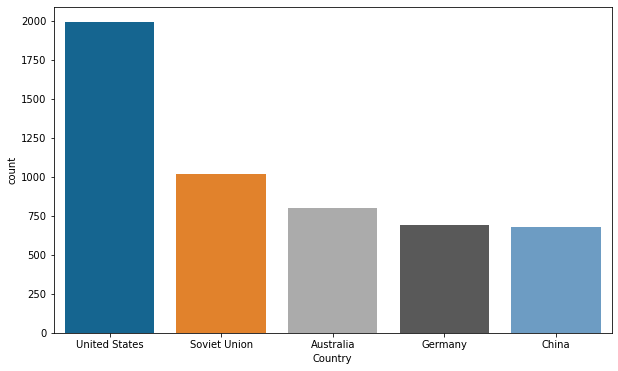

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data = Datos, x= Datos.Country , order= ['United States', 'Soviet Union', 'Australia', 'Germany', 'China'],
             ax = ax)

### Punto 3:
**Construir una tabla que muestre cuántas medallas obtuvo el género masculino, otra con el género femenino, una tabla con el total de medallas en cada año y una donde muestre los resultados por disciplina.**

## Medallas género masculino.

In [13]:
Hombres_medallas = pd.DataFrame(Datos[Datos['Gender']=="Men"].groupby("Medal")["Gender"].count())
Hombres_medallas = Hombres_medallas.set_axis(["Gender(Men)"],axis=1)
Hombres_medallas


,Gender(Men)
Medal,
Bronze,3257
Gold,3080
Silver,3051


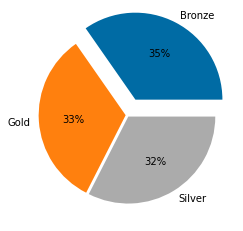

In [14]:
plt.pie(x = Hombres_medallas["Gender(Men)"]  ,
        labels = Hombres_medallas.index, 
        autopct = '%0.0f%%', explode = [0.2,0.02,0.02])
plt.show()

## Medallas género femenino

In [15]:
Mujeres_medallas = pd.DataFrame(Datos[Datos['Gender']=="Women"].groupby("Medal")["Gender"].count())
Mujeres_medallas.set_axis(["Gender(Women)"],axis=1)
Mujeres_medallas

,Gender
Medal,
Bronze,2001
Gold,1962
Silver,1965


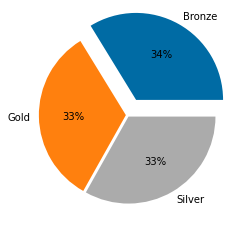

In [16]:
plt.pie(x = Mujeres_medallas["Gender"]  ,
        labels = Mujeres_medallas.index, 
        autopct = '%0.0f%%', explode = [0.2,0.02,0.02])
plt.show()

## Total de medallas en cada año:

In [17]:
medallas_año = pd.DataFrame(Datos.groupby("Year")["Medal"].count()).set_axis(["CantidadM"],axis=1)
medallas_año

,CantidadM
Year,
1976,1305
1980,1387
1984,1459
1988,1546
1992,1705
1996,1859
2000,2015
2004,1998
2008,2042


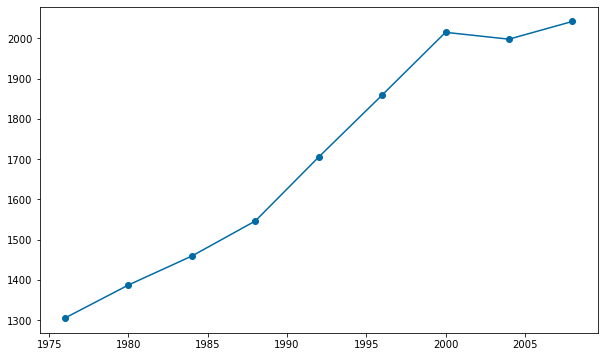

In [18]:
fig2, ax = plt.subplots(figsize = (10,6))
ax.plot(medallas_año.index, medallas_año["CantidadM"])       
ax.scatter(medallas_año.index, medallas_año["CantidadM"])  

## Resultado por disciplina

<AxesSubplot:xlabel='Discipline', ylabel='count'>

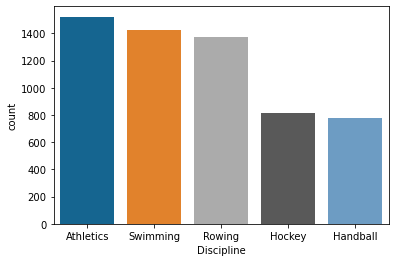

In [19]:
Datos["Discipline"].value_counts().index
sns.countplot(data = Datos, x = "Discipline", order= ['Athletics', 'Swimming', 'Rowing', 'Hockey', 'Handball'])

            Country  Cantidad Medallas
117  United Kingdom                467
118         Romania                482
119           Italy                486
120    East Germany                626
121          Russia                638
122           China                679
123         Germany                691
124       Australia                798
125    Soviet Union               1021
126   United States               1992


Text(0, 0.5, 'Cantidad medallas ')

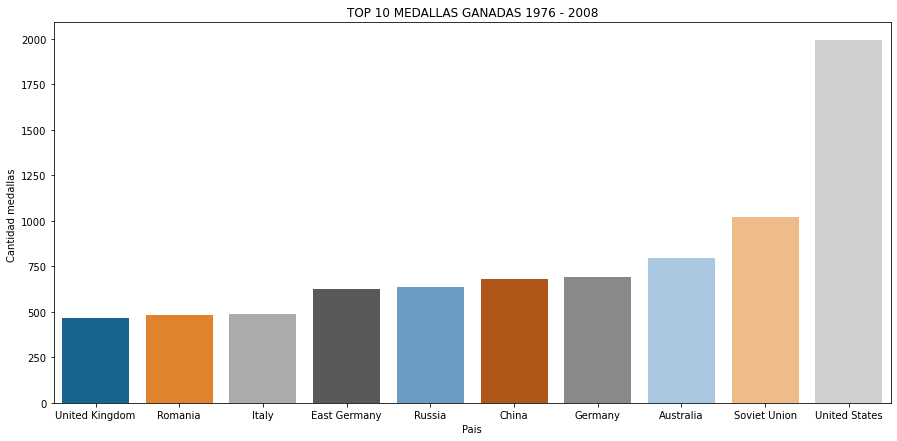

In [20]:
q1 = pd.DataFrame(Datos.groupby("Country")["Medal"].count()).set_axis(["Cantidad Medallas"],axis=1).sort_values("Cantidad Medallas").reset_index()
q1_top20 = q1.tail(10)
print(q1_top20)
grafico1, ax = plt.subplots(figsize=(15,7))
sns.barplot(data=q1_top20,x="Country",y="Cantidad Medallas" , ax=ax)
ax.set_title("TOP 10 MEDALLAS GANADAS 1976 - 2008")
ax.set_xlabel("Pais")
ax.set_ylabel("Cantidad medallas ")

Deportistas mas destacados: 

In [21]:

Deportistas = Datos.groupby(['Athlete'])["Medal"].count().sort_values()
Deportistas_1 = Deportistas.tail(10)
Deportistas_top10 = Deportistas_1.index.unique().to_numpy()
Datos.head(2)
DatosFiltrados = Datos[Datos["Athlete"].isin(Deportistas_top10)]
DatosFiltrados 

Datos_filtrados1 = DatosFiltrados.groupby(["Athlete","Medal"])["Medal"].count()
Datos_filtrados1 = pd.DataFrame(Datos_filtrados1).set_axis(["Cantidad"],axis = 1).reset_index()

Text(0, 0.5, 'Cantidad de medallas')

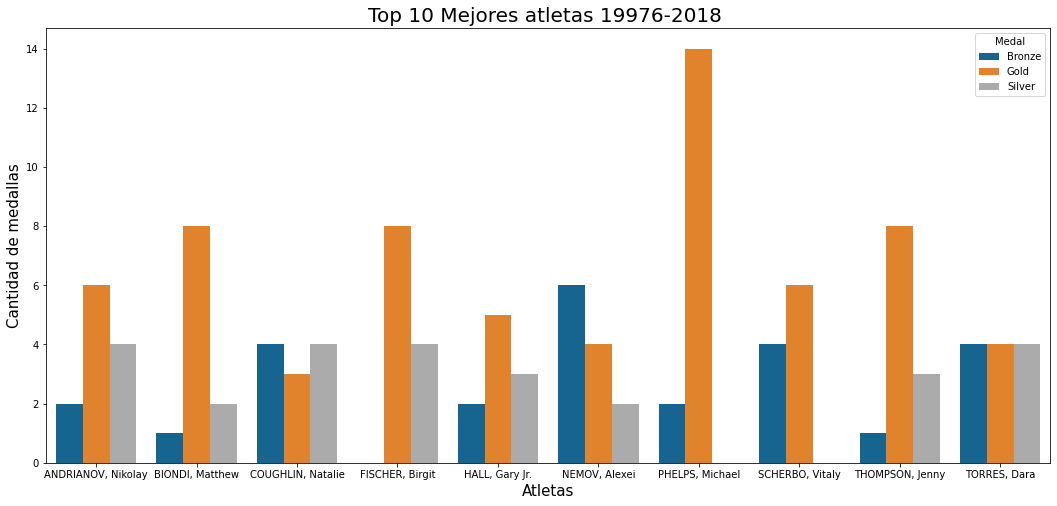

In [22]:

grafico2, ax2 = plt.subplots(figsize=(18,8))
ax2.set_title("Top 10 Mejores atletas 19976-2018 ", size=20)
sns.barplot(data=Datos_filtrados1,x="Athlete",y="Cantidad",hue="Medal",ax = ax2)
ax2.set_xlabel("Atletas",size=15)
ax2.set_ylabel("Cantidad de medallas",size=15)


    Discipline   Medal  Year  Cantidad
0  Artistic G.  Bronze  1976         1
2  Artistic G.    Gold  1976         4
4  Artistic G.  Silver  1976         2
1  Artistic G.  Bronze  1980         1
3  Artistic G.    Gold  1980         2
5  Artistic G.  Silver  1980         2
Medal
Bronze    2
Gold      2
Silver    2
Name: Medal, dtype: int64


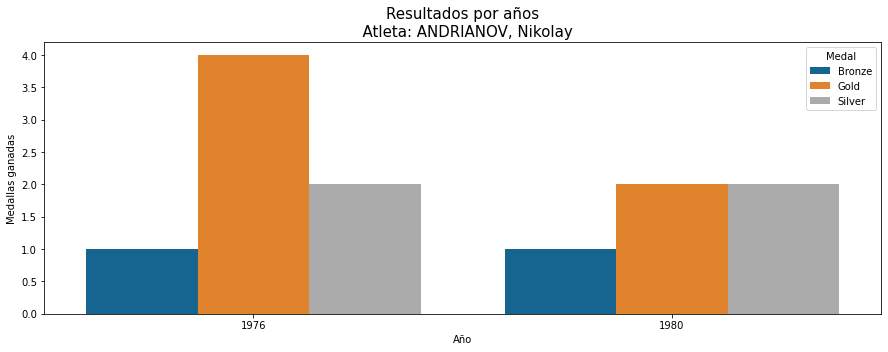

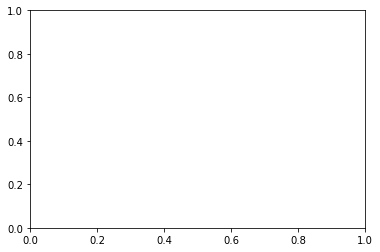

In [24]:
from pandas.core.groupby import groupby
def consulta (x):
  if x not in Datos["Athlete"].to_numpy():
    print("No existe el Atetla")
  else:
    Consulta_1 = pd.DataFrame(Datos[Datos["Athlete"] == x].groupby(["Discipline","Medal","Year"])["Medal"].count()).set_axis(["Cantidad"],axis=1).reset_index().sort_values("Year")
    print(Consulta_1)
    fig12,ax3 = plt.subplots(figsize=(15,5))
    sns.barplot(data=Consulta_1,x="Year",y="Cantidad",ax=ax3,hue="Medal",)
    ax3.set_title("Resultados por años"+"\n  Atleta: "+x,size=15)
    ax3.set_xlabel("Año")
    ax3.set_ylabel("Medallas ganadas")
    fig13,ax2 = plt.subplots()
    Medallas = Consulta_1.groupby("Medal")["Medal"].count()
    print(Medallas)
    

#consulta("PHELPS, Michael")
consulta("ANDRIANOV, Nikolay")